In [1]:
# Install dependencies on Jupyter
%pip install nltk   # In Analyzer.py

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Imports (if running in JupyterLite this might take a while)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances
from scipy.integrate import odeint
# Things for preprocessing the ideas (cleaning up the text)
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [3]:
# IDEA INPUT
# decide how you want to enter ideas by setting any of the following variables to True or false.
# If none of them is True, then we assume the ideas are provided in the code.

enter_ideas_manually = False
enter_ideas_from_csv = True

ideas = []
if enter_ideas_manually:
    print("Enter ideas. You can enter them one-by-one, or enter them all at once, separated with a newline. Stop by typing 'exit'")
    while answer.lower != "exit":
        answer = input()
        ideas.extend([idea for idea in answer.split('\n') if idea.strip() and idea != "exit"])

if enter_ideas_from_csv:
    import ipywidgets as widgets
    from IPython.display import display

    file_upload = widgets.FileUpload()

    display(file_upload)

FileUpload(value=(), description='Upload')

In [4]:
if enter_ideas_from_csv and len(file_upload.value) > 0:
    uploaded = file_upload.value[0]
    import codecs
    content = codecs.decode(uploaded.content, encoding="utf-8")
    ideas = content.split('\n')

In [5]:
if len(ideas) == 0:
    ideas = [
"""Arbitrum Multi-sig Support Service (MSS): 
We propose creating a structured multi-sig framework to facilitate funded programs within Arbitrum DAO to reduce operational spend and increase proposal efficiency.

As of April 2024, the DAO administers six programs with a designated budget for multi-sig signing. The aggregate budgeted cost across these programs for signers stands at 158,000 ARB, with an annualized total expenditure, based on estimations, of 470,000 ARB or $627,840 at an ARB price of $1.34. This is a high cost for the DAO to pay on a purely operational function, especially considering that these operational costs will likely rise as more programs are funded.

We propose creating a “Multi-sig Support Service” (MSS) to unlock significant cost-saving opportunities, lessen committee fragmentation, ensure signers are competent with multi-sigs, and reduce friction for contributors creating proposals. The MSS will comprise 12 elected individuals to all DAO-funded multi-sigs. They will be compensated a base USD amount, paid in ARB, for performing these services across the DAO.

This proposal also includes the optional steps to fund the implementation of r3gen monthly Token Flow reporting on inflows (revenue) and outflows (spend) across the DAO as well as providing detailed information and analysis on spending from MSS multisigs. Together, this proposal will help create a “backroom finance” function within the DAO that can be used across different initiatives.

The proposed changes offer the potential to generate substantial cost savings, estimated to be ~$315,000 per annum, while increasing efficiency, transparency, and security of DAO spending.
""",


"""Counter-Argument Proposal: Revising tnorm’s Arbitrum Incentive Program for a More Inclusive DeFi Ecosystem:
Concerns with the Original Proposal 9
Overlooking Underfunded Innovators
tnorm’s original proposal sets stringent criteria for incentive allocation, which, while benefiting projects with high Total Value Locked (TVL) and trading volumes, leaves out smaller but innovative projects with TVLs in the range of $50k-$200k.

Established Projects: Do They Need More Incentives?
It’s not that established projects don’t deserve support, but they likely already have a substantial user base and are generating profits from transaction fees. Do they really need additional incentives? Further bolstering them could result in a lopsided ecosystem, turning Arbitrum into an exclusive club with barriers too high for most new entrants to climb.

If the primary Key Performance Indicator (KPI) for these incentives is to boost user engagement with already established projects, the initiative may miss its mark. These projects already have a large user base; further incentives would likely only drive transaction volumes and temporarily inflate TVL due to the ‘incentive effect.’

Risks of an Exclusive Ecosystem
Concentrating incentives and resources on established projects risks turning the Arbitrum network into an exclusive club, closed off to smaller initiatives and new entrants. High barriers to entry could stifle innovation, limit diversity, and ultimately reduce the platform’s competitiveness and resilience.

A Revised Approach: Introducing the ‘Innovation Grant’
To address these issues, I propose the introduction of an ‘Innovation Grant’ or ‘Underdog Fund’ within the existing Incentive Program framework.

Benefits
Holistic Ecosystem: This ensures a diverse and inclusive platform, inviting a broader range of talents and ideas.
Resilience: A diversified project portfolio can offer a buffer against market volatility and ensure Arbitrum’s long-term competitiveness.
Implementation
Require Detailed Project Plans: To understand the scope and feasibility.
Mandate Transparency: Through regular updates and transparent reporting.
Conduct Technical Audits: To ensure the codebase meets quality standards.
Assign Advisory Roles: Involve Arbitrum Foundation or community members in an advisory capacity.
Conclusion and Call to Action
Let’s use these incentives to help smaller, promising initiatives rise to prominence instead of concentrating resources on projects that have already established their place. This way, we create a balanced ecosystem essential for the long-term health of the Arbitrum network.

I invite tnorm and the community to consider these additional insights for a more comprehensive and effective Incentive Program. Thank you.
""",

"""Catalyze Gaming Ecosystem Growth on Arbitrum:
The Gaming Catalyst Program (GCP) is designed to immediately expand awareness and adoption of Arbitrum/Orbit/Stylus by builders and players in the Gaming community.

Arbitrum has emerged as a leader in the competitive network race through a dynamic formula of innovation, robust technology, organic builders, and a variety of short and long-term incentives.

The proliferation of DeFi on Arbitrum showcases how quickly a snowball effect can onboard builders, users, and ultimately value for the Arbitrum DAO and other stakeholders (i.e. Offchain Labs, Ethereum, etc.). The TAM for DEFI has surged to $50B and is projected to surge to over $120B by 2030 and Arbitrum is leading the way.

We believe that the same opportunity exists to attract the best builders that will in turn create sticky high quality games that bring and retain new users within Arbitrum. The gaming vertical has a $250B TAM today that is projected to grow to $500B+ by 2030. Though the “web 3 + games” segment of today’s game TAM is relatively small, it is poised to grow exponentially this decade.

Several L1s and L2s see this opportunity (most notably Solana, Cardano, Opstack, Immutable, Optimism, to name a few) and are moving to claim the builders with grants and investments.
""",

"""Front-end interface to force transaction inclusion during sequencer downtime:
WakeUp Labs proposal outlines the development of a simple but effective front-end interface that enables users to force-include transactions directly on L1 when the Arbitrum Sequencer is down, aiming to increase trust among end-users navigating the Arbitrum ecosystem.
Inspired by a few community discussions (Link 1 & Link 2) , and validated historical events like: Sequencer Downtime 1, Sequener Downtime 2, Historical Sequencer Status and L2BEAT status. This tool aims to empower users with the ability to bypass the Sequencer in situations where it is unavailable or censoring transactions, thus aligning with Arbitrum’s vision for progressive decentralization.
WakeUp Labs has a proven track record of expertise in crafting exceptional blockchain tools and infrastructure. Their contributions extend to collaborating on open-source projects for major DAOs, enhancing Ethereum Foundation-funded initiatives, building complex DeFi protocols, SmartContracts and offering a developer platform that facilitates robust and scalable API calls for smart contract deployment without requiring Solidity programming skills. (Currently operating even on the Arbitrum blockchain).
""", 

"""Grant Request - Curve Finance:
This vote is to seek support for a standalone grant application by LlamaRisk on behalf of and to support the growth of Curve Finance on Arbitrum
This grant application is NOT part of LTIPP but has been designed to follow a similar model and is proposed to be distributed over a similar period.  If this proposal is approved by the DAO and the LTIPP council is agreeable this proposal can fit within the monitoring of LTIPP as well.
The goal of this proposal is to establish a deeply liquid borrowing and lending market for ARB tokens. The funds matched by the Arbitrum DAO will be used exclusively to bootstrap the supply side in the two ARB markets. The funds from Micheal Egorov are used for the crvUSD/ARB/CRV pool and upcoming LRT/WETH AMM pools. Possible LRT tokens are weETH (ether.fi), ezETH (Renzo) and reETH (KelpDAO), which have decent liquidity on arbitrum.
""", 

"""Pilot Phase: M&A for Arbitrum DAO:
The 8-weeks M&A pilot phase proposal is the next step toward the Arbitrum M&A proposal outlining the opportunity for Arbitrum DAO to form an M&A Unit focused on identifying and executing on acquisition opportunities.
The overarching aim is to utilize M&A as a key growth driver for the Arbitrum ecosystem and to help the DAO expand non-organically through acquisition opportunities that are not accessible to competing ecosystems, thereby critically enhancing Arbitrum DAO's capital allocation methods.
Full details on the M&A proposal, its operational processes and structure you can find in the Arbitrum M&A Core Proposal
""",

"""RnDAO: As the Web3 ecosystem expands with the number of L1 and L2s, the chains with unique differentiators will have key advantages. Because network effects are king in this quest, the strongest differentiator is a vibrant group of builders who can output commercially viable projects, invent new use cases for the infrastructure, and attract others to collaborate and build on each other’s work, creating network effects. As such, we propose creating and supporting an innovation cluster for the Arbitrum ecosystem.

RnDAO will provide a venture creation pipeline focused on outputting commercially viable projects. We’ll achieve this through human-centred design, hands-on support, peer-to-peer collaboration, and a staged pipeline of capital and support builders.

Building on the learnings from our pilot funded by PluralityLabs in 2023 and years of research into venture building, the proposal leverages Swarms (Web3-style Business Clusters). Swarms enable Arbitrum to generate new use cases for its infrastructure (e.g. Orbit Chain), attract and retain projects through partnerships and integrations, and compound value from the long tail of projects (not just power law) through P2P collaboration, thus creating network effects for the Arbitrum ecosystem.

Business clusters and venture builders function best with specialisation, as such we’ve selected a vertical (CollabTech) that’s both valuable for Arbitrum and serves as an ideal first step to validate the approach (which can then be copied across verticals). Concretely, we’ve selected a vertical that has:

Relatively low competition so we can test a new approach effectively: no clear market leaders among Web3 ecosystems, and limited funding available for projects.
New use cases, initial traction, and big potential: the vertical can leverage Arbitrum products and already shows some traction generating sequencer fees, has big market potential also beyond Web3, and can create systemic impact providing additional benefits to other projects and verticals in the Arbitrum ecosystem.
Is naturally a network thus leveraging some of the best traits of blockchain: composability and trustless collaboration, open innovation, and propagation incentives.
Affinity to develop new forms of collaboration: given the expertise naturally available in this community.
The bigger project to create this innovation cluster (the Swarm) is divided into 3 cycles:

a minimum viable pilot of the approach (Cycle 1, already completed)

rolling out at a functional scale to assess the real impact (Cycle 2, this proposal),

and finally reaping the benefits for Arbitrum of all the previous work (Cycle 3, subsequent proposal thanks to completion of AVI or related initiatives).

In sum, building this Swarm sets Arbitrum as the preferred ecosystem for a valuable vertical, creates network effects of talent, projects, and tools to fast-track Arbitrum’s community growth and usage of its infrastructure, and develops a replicable methodology across verticals to further grow Arbitrum.
""",
]
    
print('Ideas: ', ideas)

Ideas:  ['Arbitrum Multi-sig Support Service (MSS): \nWe propose creating a structured multi-sig framework to facilitate funded programs within Arbitrum DAO to reduce operational spend and increase proposal efficiency.\n\nAs of April 2024, the DAO administers six programs with a designated budget for multi-sig signing. The aggregate budgeted cost across these programs for signers stands at 158,000 ARB, with an annualized total expenditure, based on estimations, of 470,000 ARB or $627,840 at an ARB price of $1.34. This is a high cost for the DAO to pay on a purely operational function, especially considering that these operational costs will likely rise as more programs are funded.\n\nWe propose creating a “Multi-sig Support Service” (MSS) to unlock significant cost-saving opportunities, lessen committee fragmentation, ensure signers are competent with multi-sigs, and reduce friction for contributors creating proposals. The MSS will comprise 12 elected individuals to all DAO-funded mult

### Preprocessing steps to clean the data

[nltk_data] Downloading package punkt to /Users/jonas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jonas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jonas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<class 'sklearn.feature_extraction.text.CountVectorizer'> graph:
484780


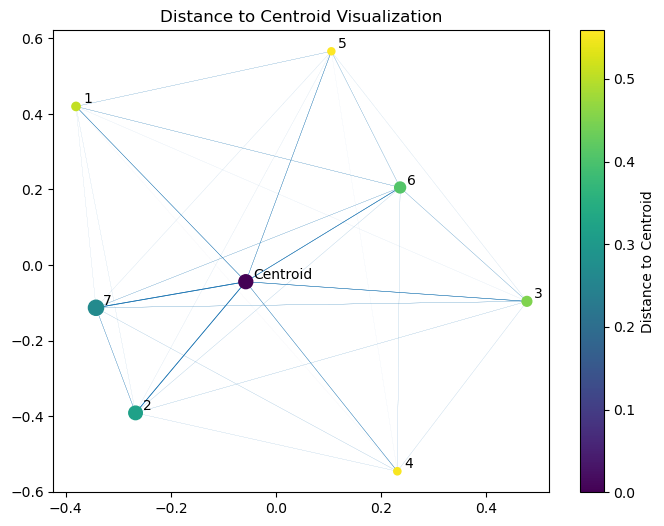

<class 'sklearn.feature_extraction.text.TfidfVectorizer'> graph:
484780


[nltk_data] Downloading package punkt to /Users/jonas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jonas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jonas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


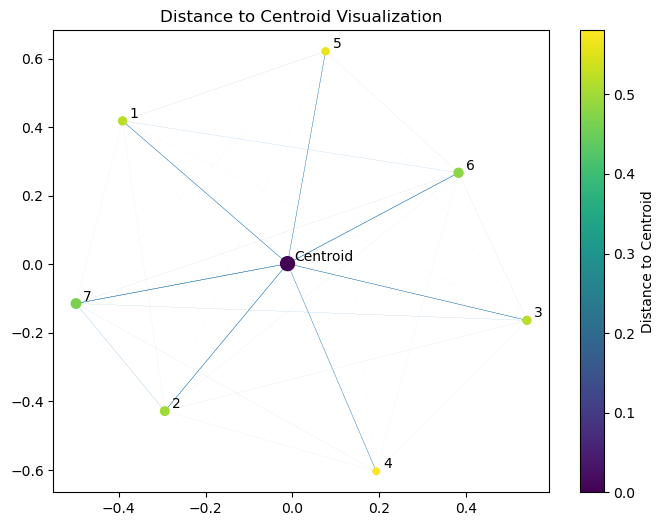

In [6]:
from Analyzer import Analyzer

# Initialize CountVectorizer to convert text into numerical vectors
count_vectorizer = CountVectorizer()

# Vectorize the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer()

count_analyzer = Analyzer(ideas, count_vectorizer)
tfidf_analyzer = Analyzer(ideas, tfidf_vectorizer)

count_analyzer.process_all()
tfidf_analyzer.process_all()